## Exercício 3: Filtros Passa-Alta

3. Crie um filtro passa-alta do tipo ideal, butterworth e gaussiano e aplique-o às imagens disponibilizadas. Visualize os mesmos dados da tarefa anterior:

    a) A imagem inicial;

    b) A imagem de cada filtro;

    c) A imagem resultante após aplicação de cada filtro.


### Importando bibliotecas

In [7]:
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

In [8]:
img_sinc_org_menor = cv2.imread('./imgs/sinc_original_menor.tif', 0)
img_sinc_org = cv2.imread('./imgs/sinc_original.png', 0)
img_sinc_rot = cv2.imread('./imgs/sinc_rot.png', 0)
img_sinc_rot2 = cv2.imread('./imgs/sinc_rot2.png', 0)
img_sinc_trans = cv2.imread('./imgs/sinc_trans.png', 0)

imgs = [ img_sinc_org_menor, img_sinc_org, img_sinc_rot, img_sinc_rot2, img_sinc_trans ]

In [9]:
def distance(point1, point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Crie um filtro passa-alta ideal
def ideal_highpass_filter(D0, imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) < D0:
                base[y, x] = 0
    return base

# Crie um filtro passa-alta Butterworth
def butterworth_highpass_filter(D0, imgShape, n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = 1-1/(1+(distance((y, x), center)/D0)**(2*n))
    return base

# Crie um filtro passa-alta Gaussiano
def gaussian_highpass_filter(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y, x] = 1 - np.exp(((-distance((y,x), center)**2)/(2*(D0**2))))
    return base

LOW PASS FILTERS
IDEAL


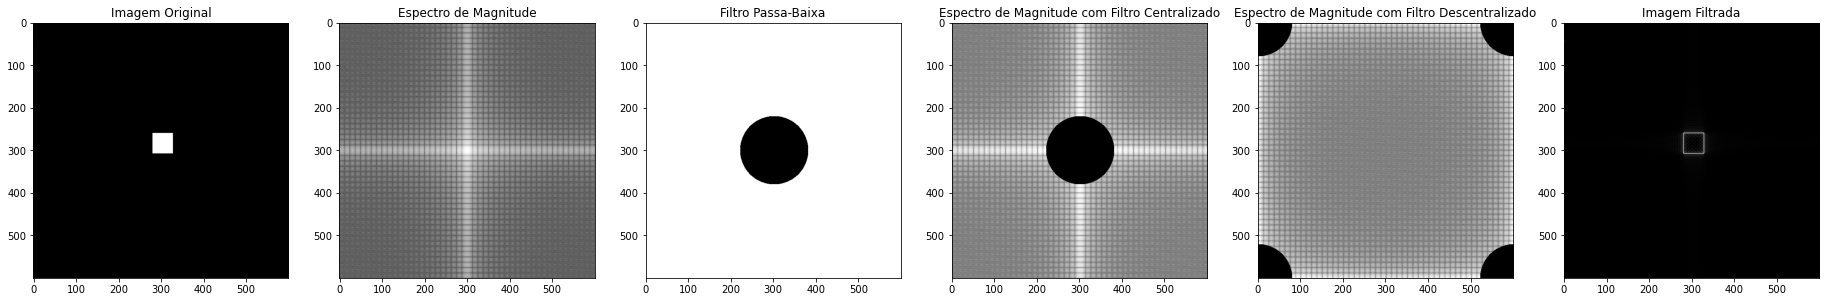

BUTTERWORTH


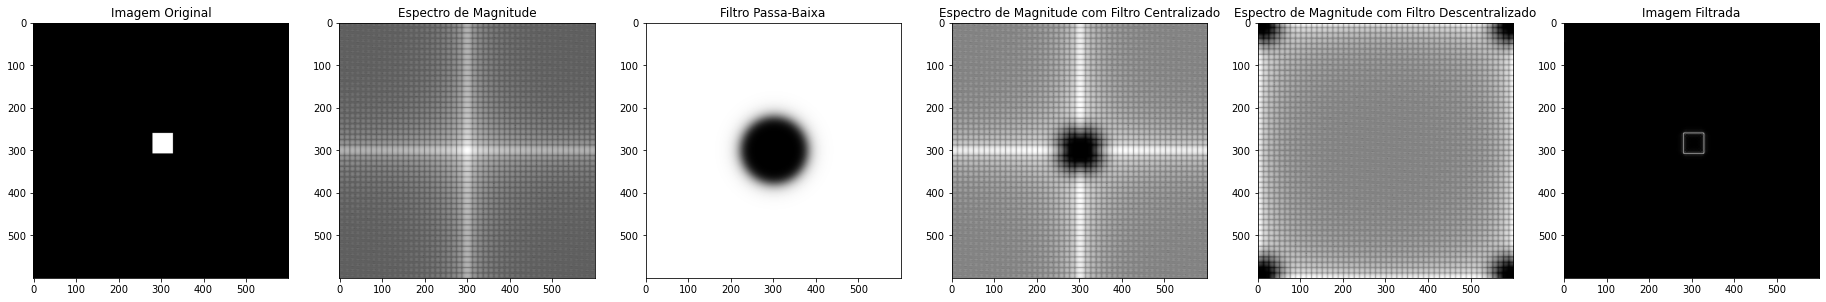

GAUSSIAN


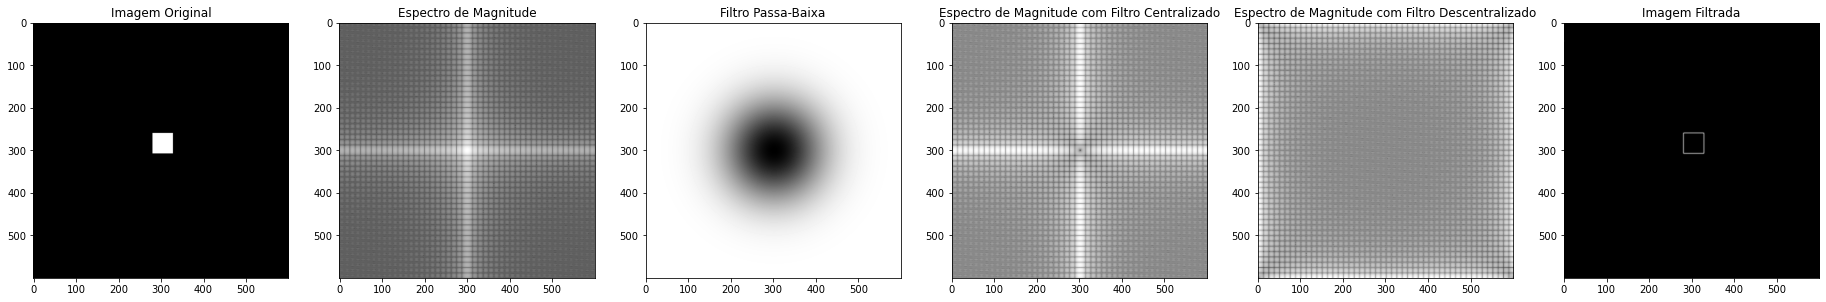

IDEAL


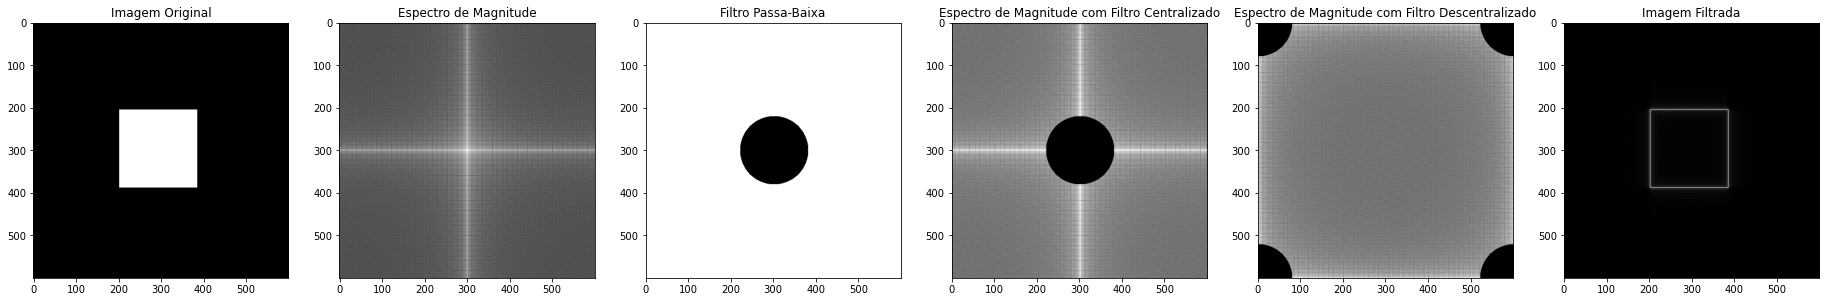

BUTTERWORTH


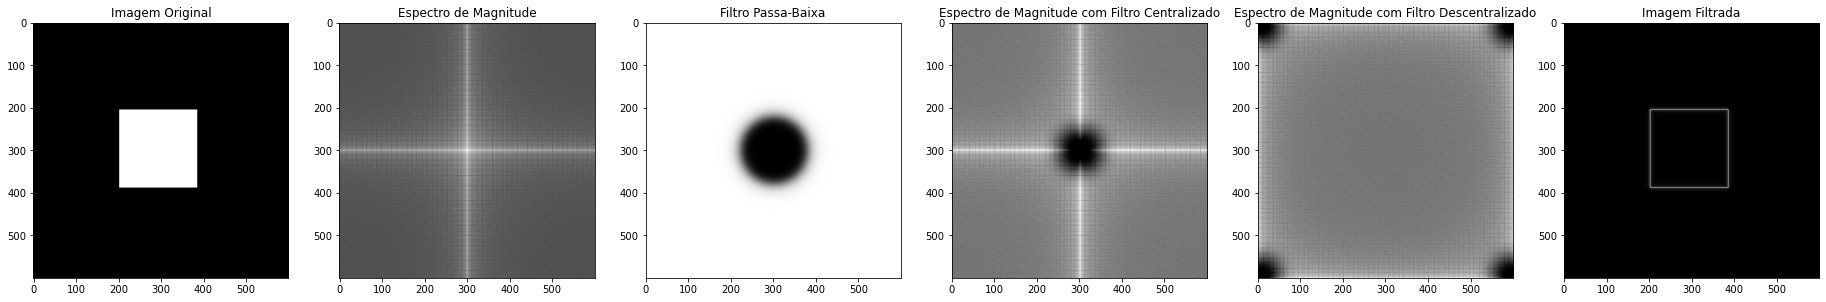

GAUSSIAN


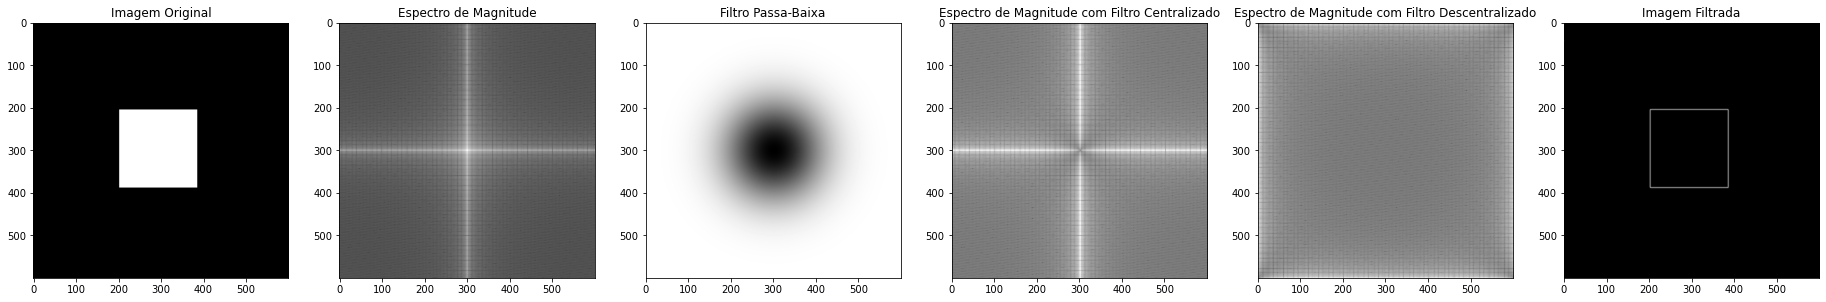

IDEAL


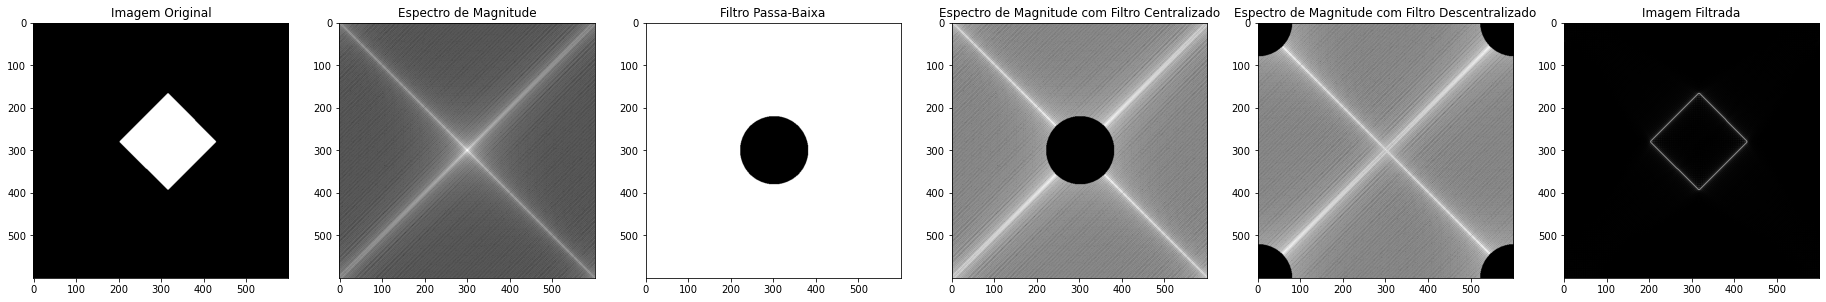

BUTTERWORTH


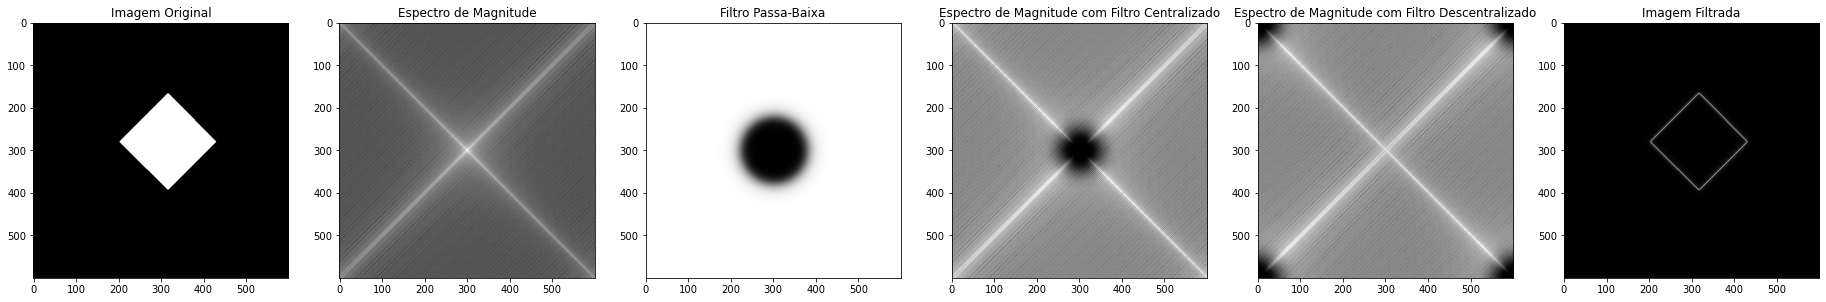

GAUSSIAN


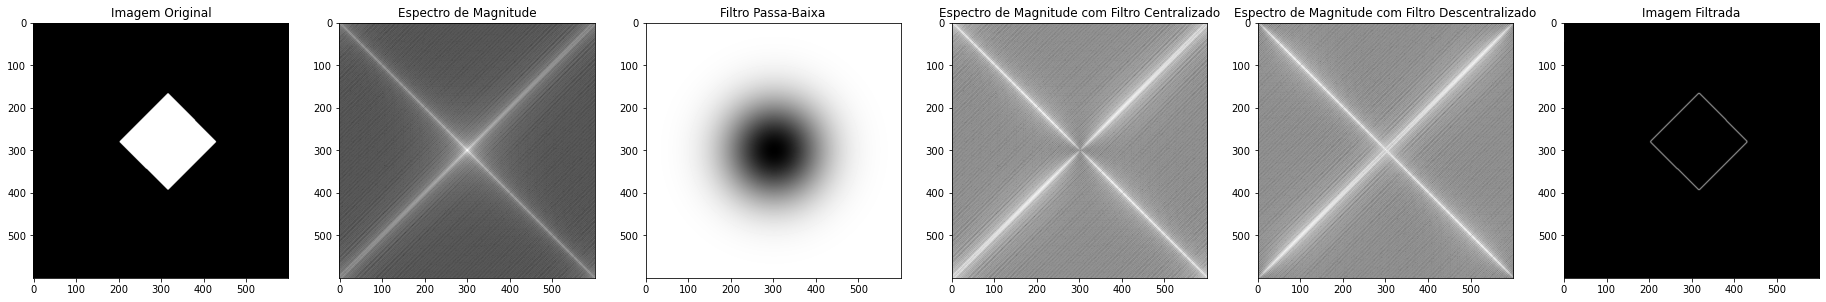

IDEAL


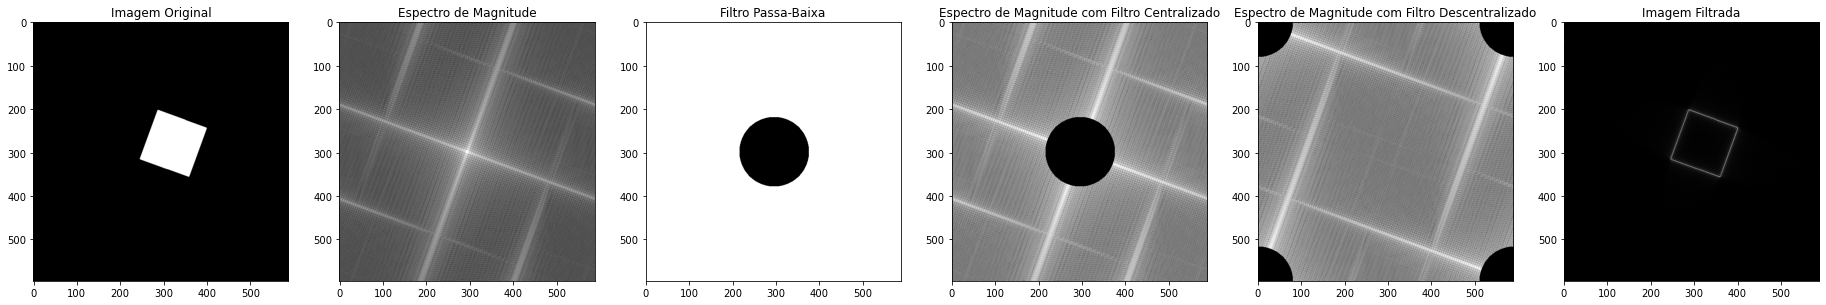

BUTTERWORTH


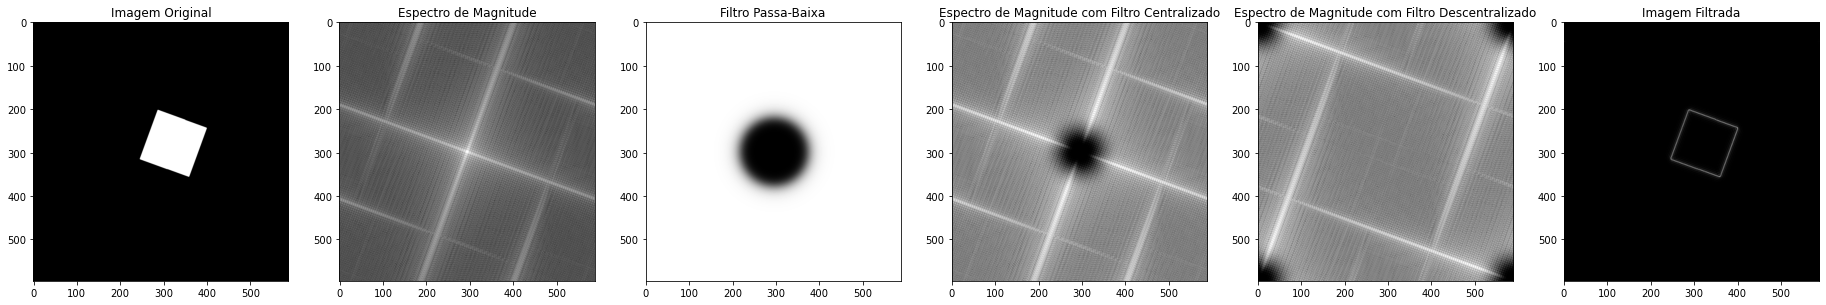

GAUSSIAN


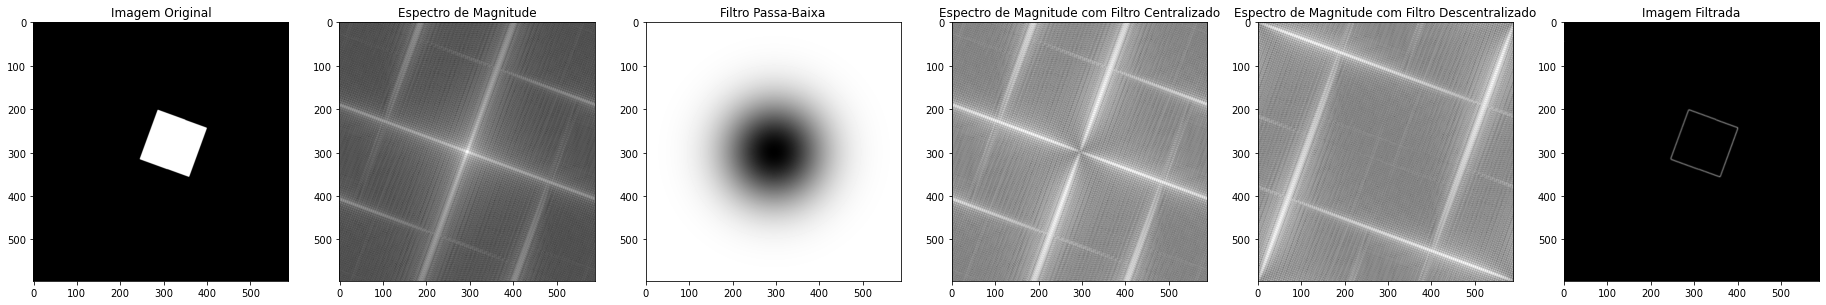

IDEAL


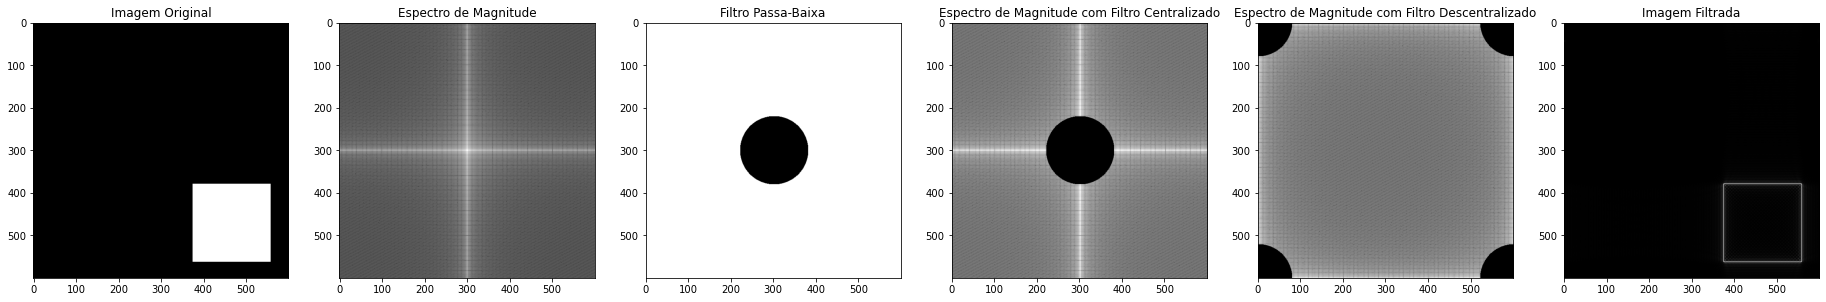

BUTTERWORTH


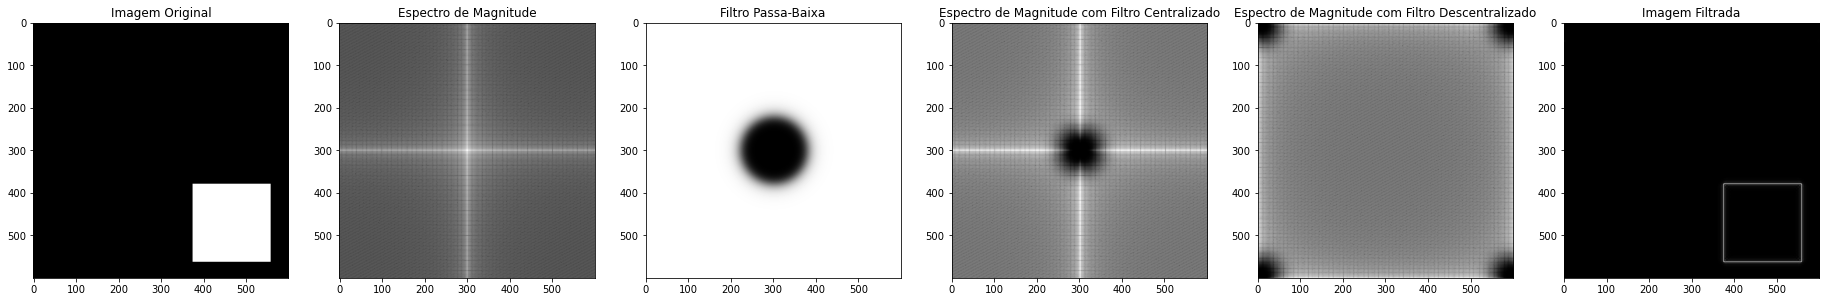

GAUSSIAN


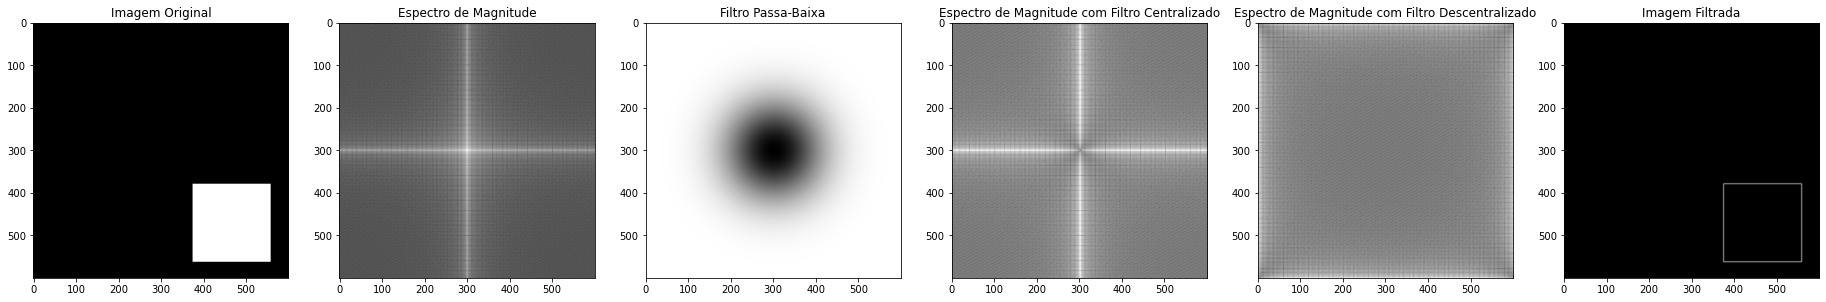

In [10]:
def apply_highpass_filter(img, variance=False, function=ideal_highpass_filter, D0=0.5, order=2, title='Low Pass Filter'):
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.01)
    
    plt.subplot(1,6,1),plt.imshow(img, cmap='gray'), plt.title('Imagem Original')
    
    magnitude_spectrum = 20*np.log(np.abs(center)+1)
    plt.subplot(1,6,2), plt.imshow( magnitude_spectrum , cmap='gray'), plt.title('Espectro de Magnitude')
    
    if function == butterworth_highpass_filter:
        # D0 = min(img.shape)/D0
        lowpass_filter = function(D0, img.shape, order)
        lowpass_filter_centered = center * function(D0, img.shape, order)
    else:
        lowpass_filter = function(D0, img.shape)
        lowpass_filter_centered = center * function(D0, img.shape)
        
    plt.subplot(1,6,3), plt.imshow( np.abs(lowpass_filter) , cmap='gray'), plt.title('Filtro Passa-Baixa')

    plt.subplot(1,6,4), plt.imshow( 20*np.log(np.abs(lowpass_filter_centered)+1) , cmap='gray'), plt.title('Espectro de Magnitude com Filtro Centralizado')
     
    lowpass_filter_decentered = np.fft.ifftshift(lowpass_filter_centered)
    plt.subplot(1,6,5), plt.imshow( 20*np.log(np.abs(lowpass_filter_decentered)+1) , cmap='gray'), plt.title('Espectro de Magnitude com Filtro Descentralizado')
    
    inverse = np.fft.ifft2(lowpass_filter_decentered)
    plt.subplot(1,6,6), plt.imshow( np.abs(inverse) , cmap='gray'), plt.title('Imagem Filtrada')
    
    plt.show()
    

D0 = 80

print("LOW PASS FILTERS")
for i in imgs:
    print("IDEAL")
    apply_highpass_filter(i, function=ideal_highpass_filter, D0=D0)
    print("BUTTERWORTH")
    apply_highpass_filter(i, function=butterworth_highpass_filter, order=5, D0=D0)
    print("GAUSSIAN")
    apply_highpass_filter(i, function=gaussian_highpass_filter, D0=D0)